<h1> Home Depot </h1>

In [391]:
from __future__ import division
import pandas as pd
import numpy as np
from nltk.stem.snowball import SnowballStemmer
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
stemmer = SnowballStemmer('english')
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [204]:
import re, collections

def words(text):
    return re.findall('[a-z]+', text.lower())

def train(features):
    model = collections.defaultdict(lambda: 1)
    for f in features:
        model[f] += 1
    return model

#NWORDS = train(words(file("/Users/attiladobi/Downloads/big.txt").read()))
NWORDS = train(words(str(df_pro_desc['product_description'].values.tolist()))) 
#NWORDS = train(words(np.str(df_pro_desc['product_description'].values)))
#return arraay, make a list convert to string. Words returns a list of words from the str, lowercase and letters only
alphabet = 'abcdefghijklmnopqrstuvwxyz'

def edits1(word):
    s = [(word[:i], word[i:]) for i in range(len(word) + 1)]
    deletes    = [a + b[1:] for a, b in s if b]
    transposes = [a + b[1] + b[0] + b[2:] for a, b in s if len(b)>1]
    replaces   = [a + c + b[1:] for a, b in s for c in alphabet if b]
    inserts    = [a + c + b     for a, b in s for c in alphabet]
    return set(deletes + transposes + inserts) # removed replaces

def known_edits2(word):
    return set(e2 for e1 in edits1(word) for e2 in edits1(e1) if e2 in NWORDS)

def known(words):
    return set(w for w in words if w in NWORDS)

def correct(word):
    if len([int(s) for s in word if s.isdigit()]) == 0:
        candidates = known([word]) or known(edits1(word)) or    known_edits2(word) or [word]
        return max(candidates, key=NWORDS.get)
    else:
        return word

In [386]:
def correct_str(string):
    return ' '.join([correct(word) for word in string.split()]) # ' '.join(list) to make into one string

In [388]:
def str_common_word(str1, str2):
    return sum(int(str2.lower().find(word)>=0) for word in str1.lower().split())

def str_stemmer(s):
    return " ".join([stemmer.stem(word) for word in s.lower().split()])

In [456]:
str_common_word('hello dude', 'dude what')

1

In [429]:
df_train = pd.read_csv('/Users/attiladobi/Downloads/train.csv', encoding="ISO-8859-1")
df_test = pd.read_csv('/Users/attiladobi/Downloads/test.csv', encoding="ISO-8859-1")
df_attr = pd.read_csv('/Users/attiladobi/Downloads/attributes.csv')
df_pro_desc = pd.read_csv('/Users/attiladobi/Downloads/product_descriptions.csv')

In [430]:
df_pro_desc

,product_uid,product_description
0,100001,"Not only do angles make joints stronger, they ..."
1,100002,BEHR Premium Textured DECKOVER is an innovativ...
2,100003,Classic architecture meets contemporary design...
3,100004,The Grape Solar 265-Watt Polycrystalline PV So...
4,100005,Update your bathroom with the Delta Vero Singl...
5,100006,Achieving delicious results is almost effortle...
6,100007,The Quantum Adjustable 2-Light LED Black Emerg...
7,100008,The Teks #10 x 1-1/2 in. Zinc-Plated Steel Was...
8,100009,Get the House of Fara 3/4 in. x 3 in. x 8 ft. ...
9,100010,Valley View Industries Metal Stakes (4-Pack) a...


In [453]:
df_attr


,product_uid,name,value
0,100001,Bullet01,Versatile connector for various 90° connection...
1,100001,Bullet02,Stronger than angled nailing or screw fastenin...
2,100001,Bullet03,Help ensure joints are consistently straight a...
3,100001,Bullet04,Dimensions: 3 in. x 3 in. x 1-1/2 in.
4,100001,Bullet05,Made from 12-Gauge steel
5,100001,Bullet06,Galvanized for extra corrosion resistance
6,100001,Bullet07,Install with 10d common nails or #9 x 1-1/2 in...
7,100001,Gauge,12
8,100001,Material,Galvanized Steel
9,100001,MFG Brand Name,Simpson Strong-Tie


<h2> First correct the search terms for spelling and return a list of words. Then pair product description with uid </h2>

In [397]:
df_train['ST_corr']=df_train['search_term'].map(lambda x: str_stemmer(correct_str(x)))

In [432]:
df_train = pd.merge(df_train, df_pro_desc, how='left', on='product_uid')
df_train['product_description']=df_train['product_description'].map(lambda x: str_stemmer(x))
#df_train['product_description'] =  [df_pro_desc['product_description'][df_pro_desc['product_uid'] \
#                                == uid].values[0] for uid in df_train['product_uid']]

In [455]:
#df_train = pd.merge(df_train, df_attr.groupby(['product_uid']), how='left', on='product_uid')
#df_train['value']=df_train['value'].map(lambda x: str_stemmer(x))
#df_train['name']=df_train['name'].map(lambda x: str_stemmer(x))

df_train['product_atr_val'] =  [str_stemmer(str(df_attr['value'][df_attr['product_uid'] \
                                == uid].values)) for uid in df_train['product_uid']]


In [457]:
df_train['product_atr_name'] =  [str_stemmer(str(df_attr['name'][df_attr['product_uid'] \
                                == uid].values)) for uid in df_train['product_uid']]

In [459]:
df_attr.groupby('product_uid').apply(lambda x: x.sum())

product_uid             
100001       product_uid                                          1.50002e+06
             name           Bullet01Bullet02Bullet03Bullet04Bullet05Bullet...
             value          Versatile connector for various 90° connection...
100002       product_uid                                          3.50007e+06
             name           Application MethodAssembled Depth (in.)Assembl...
             value          Brush,Roller,Spray6.63 in7.76 in6.63 inRevives...
100003       product_uid                                           3.2001e+06
             name           Built-in flangeBullet01Bullet02Bullet03Bullet0...
             value          YesSlightly narrower for tighter spacesDesigne...
100004       product_uid                                           2.5001e+06
             name           Amperage (amps)Bullet01Bullet02Bullet03Bullet0...
             value          8.56Positive power tolerance (0 to +5-Watt)Ant...
100005       product_uid               

In [ ]:
df_out['product_attribute_value'] = \
   np.array([df_att[df_att['product_uid'] == id]['value'].values.tolist() for id in df_out['product_uid']])
df_out['product_attribute_value'] = \
   np.array([[s if s == s else '' for s in s_list] for s_list in df_out['product_attribute_value']])
df_out['product_attribute_value'] = df_out['product_attribute_value'].map(lambda x: ' '.join(x))

In [401]:
df_train[df_train['relevance']==1]

,id,product_uid,product_title,search_term,relevance,ST_corr,product_description,product_atr_val,product_atr_name,product_info,word_in_title,word_in_description,len_of_query,word_in_atr_val,word_in_atr_name
17,69,100017,MD Building Products 36 in. x 36 in. Cloverlea...,door guards,1,door guard,The MD Building Products 36 in. x 36 in. x 1/5...,"[ 'Use to repair door or window screens, or ad...",['Bullet01' 'Bullet02' 'Bullet03' 'Bullet04' '...,door guards\tMD Building Products 36 in. x 36 ...,0,1,2,1,1
49,178,100033,HDX 48 in. W x 72 in. H x 18 in. D Decorative ...,kitchen cabinet finishes,1,kitchen cabinet finish,This easy-to-assemble Decorative Wire Chrome F...,['18 in' '72 in' '48 in'\n 'Each shelf support...,['Assembled Depth (in.)' 'Assembled Height (in...,kitchen cabinet finishes\tHDX 48 in. W x 72 i...,0,1,3,0,0
56,195,100034,Marshalltown Masonry Brush,mortar tools,1,mortar tool,Use the Marshalltown Masonry Brush for a wide ...,['6.625' 'Bristles are made of white Tampico f...,['Brush width (in.)' 'Bullet01' 'Bullet02' 'Bu...,mortar tools\tMarshalltown Masonry Brush\tUse ...,0,0,2,0,0
217,696,100119,Purdy 2 in. A. P. All Paints Brush Set (3-Pack),paint roller inserts,1,paint roller insert,"The Purdy 1 in. Angled, 1-1/2 in. Angled, 2 in...",['Brush' '2.75' 'Nylon/Polyester Blend' '2'\n ...,['Applicator/Tool Type' 'Brush head height (in...,paint roller inserts\tPurdy 2 in. A. P. All Pa...,1,1,3,1,1
226,734,100128,Proslat 32 sq. ft. White Wall Panel Kit,garage chair organizer,1,garag chair organ,This Proslat wall solution features Proslat's ...,['0.5 in' '48 in' '96 in'\n 'Weight capacity o...,['Assembled Depth (in.)' 'Assembled Height (in...,garage chair organizer\tProslat 32 sq. ft. Whi...,0,0,3,0,0
230,742,100129,Sundstrom Safety Silicone Half Mask Respirator,face masks,1,face mask,The SR 100 half mask Air Purifying Respirator ...,['A unique face seal design providing a high p...,['Bullet01' 'Bullet02' 'Bullet03' 'Bullet04' '...,face masks\tSundstrom Safety Silicone Half Mas...,0,1,2,2,0
242,764,100134,Frost King E/O 84 in. x 110 in. Patio Shrink W...,plastic covers,1,plastic cover,This Thermwell Products 84 in. x 110 in. Patio...,['Weatherstrip' 'Fits many patio doors and lar...,['Builders Hardware Product Type' 'Bullet01' '...,plastic covers\tFrost King E/O 84 in. x 110 in...,0,0,2,0,0
270,867,100149,MARAZZI Montagna Gunstock 6 in. x 24 in. Glaze...,funnel 6 inch,1,funnel 6 inch,Montagna Gunstock is a hand scraped wood plank...,"['6x24' '276'\n '14.53 square feet, 15 pieces ...",['Approximate Tile Size' 'Break Strength (lb.)...,funnel 6 inch\tMARAZZI Montagna Gunstock 6 in....,1,1,3,1,1
289,912,100152,Cub Cadet 42 in. and 46 in. LTX and XT1 Bagger,foof leaf broom,1,foo leaf broom,The Cub Cadet 42 in. and 46 in. LTX and XT1Bag...,['Grass collection system for riding lawn mowe...,['Bullet01' 'Bullet02' 'Bullet03' 'Bullet04' '...,foof leaf broom\tCub Cadet 42 in. and 46 in. L...,0,0,3,0,0
290,918,100152,Cub Cadet 42 in. and 46 in. LTX and XT1 Bagger,lawn tractor,1,lawn tractor,The Cub Cadet 42 in. and 46 in. LTX and XT1Bag...,['Grass collection system for riding lawn mowe...,['Bullet01' 'Bullet02' 'Bullet03' 'Bullet04' '...,lawn tractor\tCub Cadet 42 in. and 46 in. LTX ...,0,2,2,2,0


In [375]:
df_train['len_of_query'] = df_train['search_term'].map(lambda x:len(x.split())).astype(np.int64)
df_train['product_info'] = df_train['search_term']+"\t"+df_train['product_title']+"\t"+df_train['product_description'] +"\t"+df_train['product_atr_val']+"\t"+df_train['product_atr_name']
df_train['word_in_title'] = df_train['product_info'].map(lambda x:str_common_word(x.split('\t')[0],x.split('\t')[1]))
df_train['word_in_description'] = df_train['product_info'].map(lambda x:str_common_word(x.split('\t')[0],x.split('\t')[2]))
df_train['word_in_atr_val'] = df_train['product_info'].map(lambda x:str_common_word(x.split('\t')[0],x.split('\t')[3]))
df_train['word_in_atr_name'] = df_train['product_info'].map(lambda x:str_common_word(x.split('\t')[0],x.split('\t')[4]))

df_train_droped = df_train.drop(['search_term','ST_corr','product_title','product_description',\
                                 'id','product_uid','product_info','product_atr_val','product_atr_name'],axis=1)
df_train_droped

,relevance,word_in_title,word_in_description,len_of_query,word_in_atr_val,word_in_atr_name
0,3.00,1,1,2,1,0
1,2.50,1,1,2,1,1
2,3.00,2,2,2,2,2
3,2.33,1,1,3,2,2
4,2.67,3,3,3,3,2
5,3.00,1,2,2,1,0
6,2.67,2,2,3,2,1
7,3.00,0,0,1,0,0
8,2.67,2,2,2,2,2
9,3.00,2,2,2,1,0


In [380]:
df_train['product_info'][0].split('\t')[0], df_train['product_info'][0].split('\t')[2]

(u'angle bracket',
 u'Not only do angles make joints stronger, they also provide more consistent, straight corners. Simpson Strong-Tie offers a wide variety of angles in various sizes and thicknesses to handle light-duty jobs or projects where a structural connection is needed. Some can be bent (skewed) to match the project. For outdoor projects or those where moisture is present, use our ZMAX zinc-coated connectors, which provide extra resistance against corrosion (look for a "Z" at the end of the model number).Versatile connector for various 90 connections and home repair projectsStronger than angled nailing or screw fastening aloneHelp ensure joints are consistently straight and strongDimensions: 3 in. x 3 in. x 1-1/2 in.Made from 12-Gauge steelGalvanized for extra corrosion resistanceInstall with 10d common nails or #9 x 1-1/2 in. Strong-Drive SD screws')

In [381]:
str_common_word(df_train['product_info'][0].split('\t')[0],df_train['product_info'][0].split('\t')[2])

1

<h1> Scikit fitting </h1>

In [376]:
#clf =  AdaBoostClassifier()

fr=0.4
df_training=df_train_droped[:int(len(df_train_droped)*fr)]
df_testing= df_train_droped[int(len(df_train_droped)*fr):]

y_train = df_training['relevance'].values
X_train = df_training.drop(['relevance'],axis=1).values
X_test = df_testing.drop(['relevance'],axis=1).values
y_test = df_testing['relevance'].values

rf = RandomForestRegressor(n_estimators=15, max_depth=6, random_state=0)
clf = BaggingRegressor(rf, n_estimators=45, max_samples=0.1, random_state=25)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
RMSE=sqrt(sum((y_pred- y_test)**2)/(size(y_test)))
RMSE

0.50203829065482453

In [275]:
np.arange(0.1,0.9,0.1)

array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8])

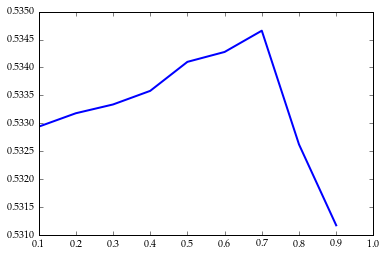

In [280]:
xx=np.arange(0.1,1,0.1)
RMSE=[]
for fr in xx:
    df_training=df_train_droped[:int(len(df_train_droped)*fr)]
    df_testing= df_train_droped[int(len(df_train_droped)*.1):]
    
    y_train = df_training['relevance'].values
    X_train = df_training.drop(['relevance'],axis=1).values
    X_test = df_testing.drop(['relevance'],axis=1).values
    y_test = df_testing['relevance'].values
    rf = RandomForestRegressor(n_estimators=15, max_depth=6, random_state=0)
    clf = BaggingRegressor(rf, n_estimators=45, max_samples=0.1, random_state=25)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    RMSE.append(sqrt(sum((y_pred- y_test)**2)/(size(y_test))))
plt.plot(xx,RMSE)

In [298]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

In [287]:
clf.get_params

<bound method BaggingRegressor.get_params of BaggingRegressor(base_estimator=RandomForestRegressor(bootstrap=True, compute_importances=None,
           criterion='mse', max_depth=6, max_features='auto',
           max_leaf_nodes=None, min_density=None, min_samples_leaf=1,
           min_samples_split=2, n_estimators=15, n_jobs=1, oob_score=False,
           random_state=0, verbose=0),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=0.1, n_estimators=45, n_jobs=1, oob_score=False,
         random_state=25, verbose=0)>

<h2> Now add the same attributes to features </h2>

In [200]:
set_desc=set((words(str(df_pro_desc['product_description'].values.tolist()))))

In [201]:
set_search=set(words(str(df_train['search_term'].values.tolist())))

In [203]:
len(list(set_search-set_desc)) / len(set_search)

0.25145949024633346

In [231]:
df_test['ST_corr']=df_test['search_term'].map(lambda x: correct_str(x))

df_test['product_description'] =  [df_pro_desc['product_description'][df_pro_desc['product_uid'] \
                                == uid].values[0] for uid in df_test['product_uid']]
df_test['product_atr_val'] =  [df_attr['value'][df_attr['product_uid'] \
                                == uid].values for uid in df_test['product_uid']]
df_test['product_atr_name'] =  [df_attr['name'][df_attr['product_uid'] \
                                == uid].values for uid in df_test['product_uid']]

In [254]:
[[correct(word), word]  for word in list(set_search-set_desc)]

[['ryobi', 'kyobi'],
 ['puffy', 'huffy'],
 ['replacement', 'repacement'],
 ['yellow', 'yelloe'],
 ['micewave', 'micewave'],
 ['porch', 'porche'],
 ['dining', 'diining'],
 ['bait', 'balist'],
 ['stacking', 'stcking'],
 ['gazhose', 'gazhose'],
 ['inches', 'jnches'],
 ['pipes', 'ppes'],
 ['per', 'pper'],
 ['acrylic', 'acrtlic'],
 ['capa', 'capua'],
 ['wall', 'weall'],
 ['contractor', 'contracor'],
 ['connect', 'connecto'],
 ['bercello', 'barcello'],
 ['inch', 'inche'],
 ['hurricane', 'huricane'],
 ['christmas', 'chrismas'],
 ['compressor', 'compressro'],
 ['flashlights', 'flashlightts'],
 ['granules', 'granuels'],
 ['cm', 'cmk'],
 ['vanity', 'vainty'],
 ['kitchen', 'kithen'],
 ['nailshand', 'nailshand'],
 ['gus', 'gugs'],
 ['pine', 'poinye'],
 ['fee', 'fece'],
 ['slideout', 'sideout'],
 ['furnace', 'furnance'],
 ['sydney', 'sydey'],
 ['shower', 'shwoer'],
 ['cooktop', 'copoktop'],
 ['capacitor', 'capacitator'],
 ['thinking', 'chinking'],
 ['sideways', 'sideays'],
 ['part', 'patr'],
 ['dor

In [122]:
correct('3a apples hello kevi wha up')

'3a apples hello kevi wha up'

In [138]:
string='3a'
len([int(s) for s in string if s.isdigit()])

1

In [125]:
def correct_str(string):
    return [correct(word) for word in string.split()]
    

In [140]:
correct_str('90mm apples hello kevi wha up')

['90mm', 'apples', 'hello', 'kevin', 'what', 'up']